In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [16]:
df = pd.read_csv(r'https://raw.githubusercontent.com/OscarL7/Students-performance/main/StudentsPerformance.csv')
df['tscore'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df['tscore'] = df['tscore'].astype(int)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,tscore
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


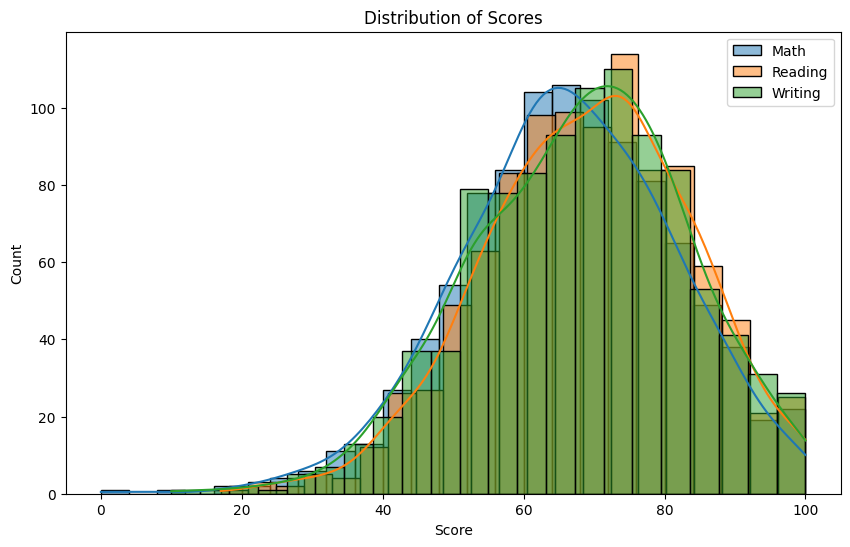

In [3]:
# 1. Distribution of Scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='math score', kde=True, label='Math')
sns.histplot(data=df, x='reading score', kde=True, label='Reading')
sns.histplot(data=df, x='writing score', kde=True, label='Writing')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.legend()
plt.show()

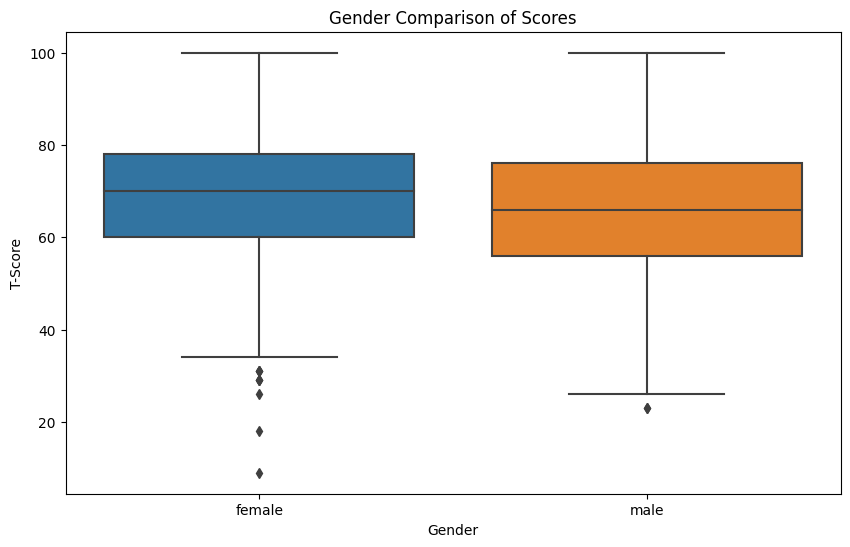

In [4]:
# 2. Gender Comparison of Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='tscore')
plt.title('Gender Comparison of Scores')
plt.xlabel('Gender')
plt.ylabel('T-Score')
plt.show()

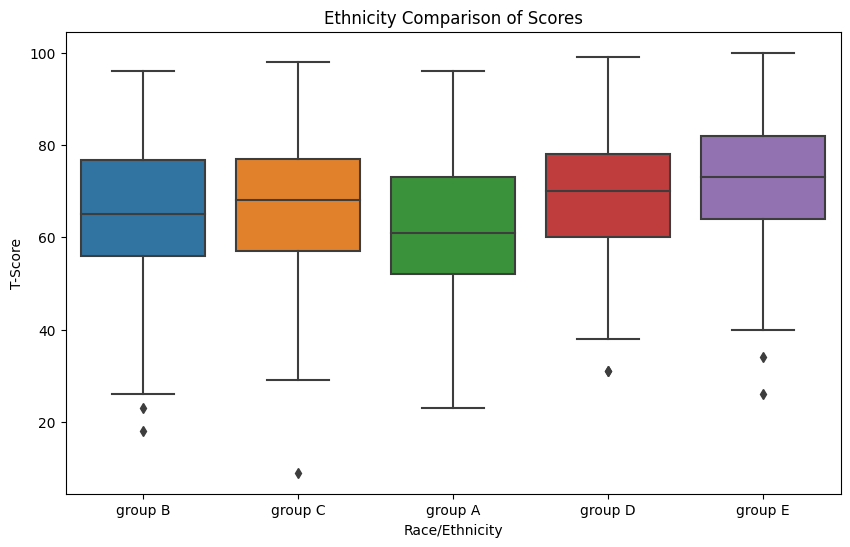

In [5]:
# 3. Ethnicity Comparison of Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='race/ethnicity', y='tscore')
plt.title('Ethnicity Comparison of Scores')
plt.xlabel('Race/Ethnicity')
plt.ylabel('T-Score')
plt.show()

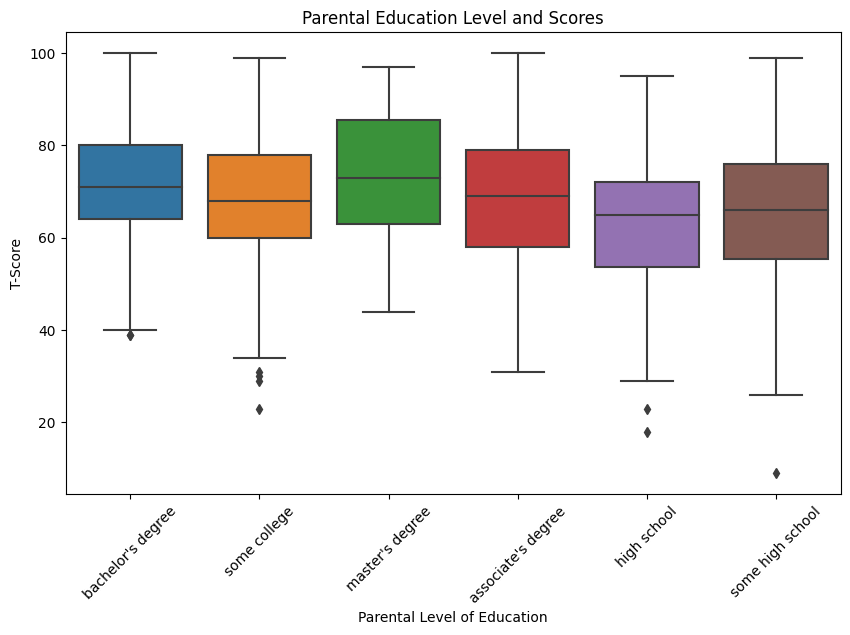

In [6]:
# 4. Parental Education Level and Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='parental level of education', y='tscore')
plt.title('Parental Education Level and Scores')
plt.xlabel('Parental Level of Education')
plt.ylabel('T-Score')
plt.xticks(rotation=45)
plt.show()

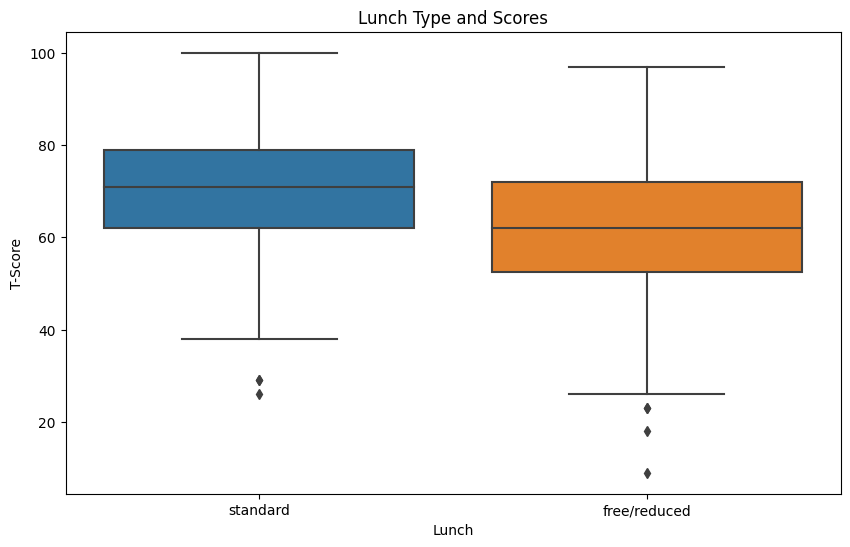

In [7]:
# 5. Lunch Type and Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='lunch', y='tscore')
plt.title('Lunch Type and Scores')
plt.xlabel('Lunch')
plt.ylabel('T-Score')
plt.show()

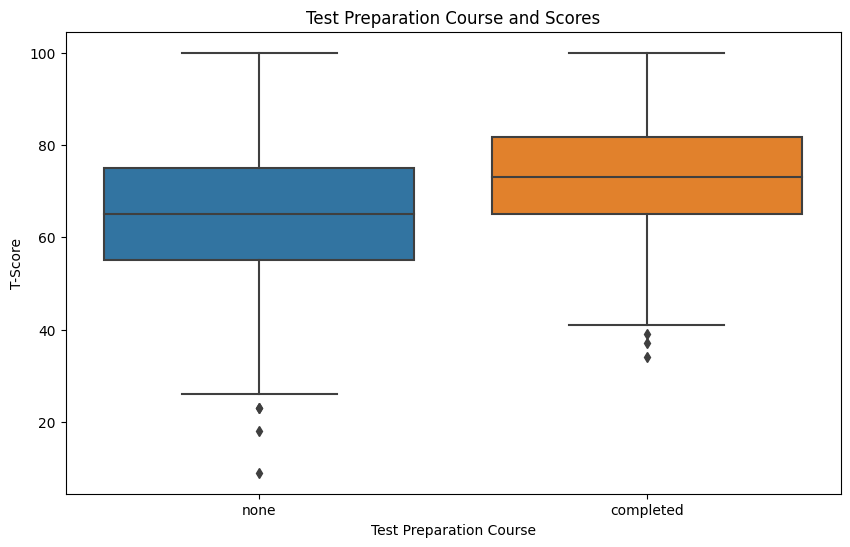

In [8]:
# 6. Test Preparation Course and Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='test preparation course', y='tscore')
plt.title('Test Preparation Course and Scores')
plt.xlabel('Test Preparation Course')
plt.ylabel('T-Score')
plt.show()

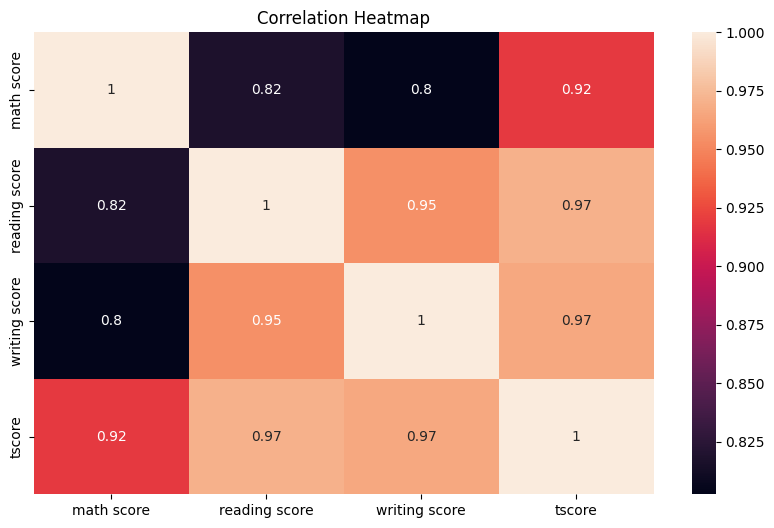

In [9]:
# 7. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['math score', 'reading score', 'writing score', 'tscore']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# 8. Statistical Summary by Gender
gender_summary = df.groupby('gender')[['math score', 'reading score', 'writing score']].describe()
print("Statistical Summary by Gender:")
print(gender_summary)

Statistical Summary by Gender:
       math score                                                        
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0  \
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score             ...              writing score              
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.608108  ...  83.0  100.0         518.0  72.467181  \
male           482.0  65.473029  ...  75.0  100.0         482.0  63.311203   

                                                   
              std   min   25%   50%    75%    max  
gender                                             
female  14.844842  10.0  64.0  74.0  82.00  100.0  

In [11]:
# 9. Statistical Comparison of Math Scores
math_scores_male = df[df['gender'] == 'male']['math score']
math_scores_female = df[df['gender'] == 'female']['math score']
t_stat, p_value = stats.ttest_ind(math_scores_male, math_scores_female, equal_var=False)
print("\nStatistical Comparison of Math Scores:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Statistical Comparison of Math Scores:
T-statistic: 5.398000564160736
P-value: 8.420838109090415e-08


In [12]:
# 10. Statistical Comparison of Writing Scores by Ethnicity
ethnicity_scores = []
ethnicities = df['race/ethnicity'].unique()
for ethnicity in ethnicities:
    score = df[df['race/ethnicity'] == ethnicity]['writing score']
    ethnicity_scores.append(score)
f_stat, p_value = stats.f_oneway(*ethnicity_scores)
print("\nStatistical Comparison of Writing Scores by Ethnicity:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


Statistical Comparison of Writing Scores by Ethnicity:
F-statistic: 7.162415174347505
P-value: 1.0979189070067382e-05
